In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import tensorflow as tf
from tensorflow import keras
from data_transfo import  get_train_test_cnn
from cnns import create_cnn

from modeler import display_model, compile_model
import pandas as pd

2022-06-08 13:51:06.142556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-08 13:51:06.142622: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_df = pd.read_csv('https://maxime-devanne.com/datasets/ECG200/ECG200_TRAIN.tsv', sep='\t', header=None)
test_df = pd.read_csv('https://maxime-devanne.com/datasets/ECG200/ECG200_TEST.tsv', sep='\t', header=None)

In [3]:
x_train, y_train, x_test, y_test = get_train_test_cnn(
                                                        train_df,
                                                        test_df
                                                        )

(200, 96)


In [4]:
simple_cnn = create_cnn(x_train, y_train, drop=0.2)

2022-06-08 13:51:10.432428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-08 13:51:10.432480: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-08 13:51:10.432512: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cc-t14): /proc/driver/nvidia/version does not exist
2022-06-08 13:51:10.433074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 96, 6)             96        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 6)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 6)             546       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 6)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0     

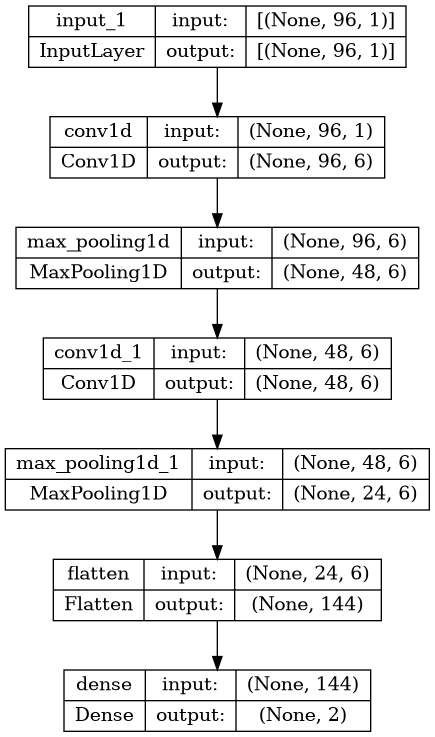

In [5]:
compile_model(simple_cnn, mode='cnn', learning_r=0.5)
display_model(simple_cnn)

In [6]:
simple_cnn.fit(x_train, y_train, batch_size=25, epochs=35, verbose=0)

In [8]:
loss,acc = simple_cnn.evaluate(x_test,y_test, batch_size=25, verbose=False)
print("L'accuracy sur l'ensemble du test est:",acc)

L'accuracy sur l'ensemble du test est: 0.8500000238418579
